In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
df = pd.read_csv("18-concrete_data.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


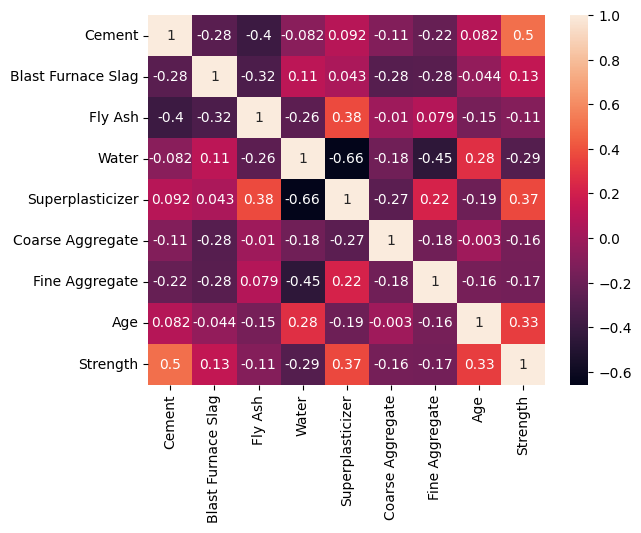

In [10]:
sns.heatmap(df.corr(), annot=True)
plt.show()

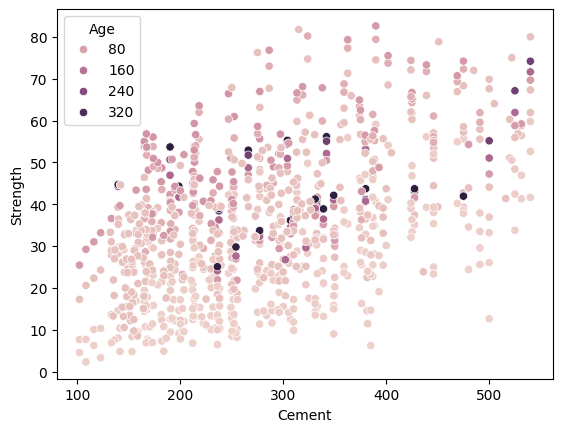

In [12]:
sns.scatterplot(data = df, x = "Cement", y = "Strength", hue = "Age")
plt.show()

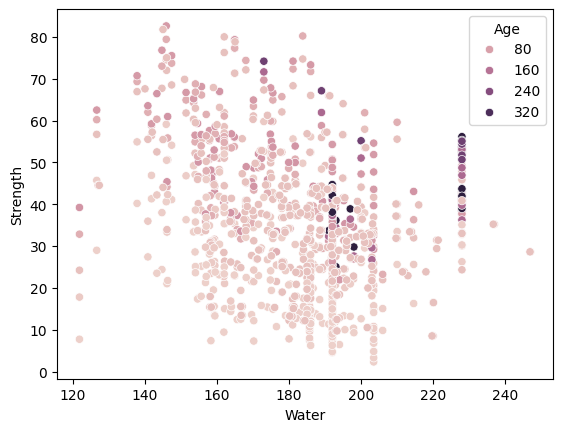

In [13]:
sns.scatterplot(data = df, x = "Water", y = "Strength", hue = "Age")
plt.show()

In [14]:
X = df.drop("Strength", axis = 1)
y = df["Strength"]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=15)

In [15]:
from sklearn.tree import DecisionTreeRegressor 

In [16]:
# first week learner 
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [17]:
y2 = y_train - tree_reg1.predict(X_train) # r2 score for training data

In [18]:
y2[:5]

919   -15.044359
641    -2.967000
535     2.098039
835   -10.123407
583    -2.334359
Name: Strength, dtype: float64

In [19]:
# second week learner 
tree_reg2 = DecisionTreeRegressor(max_depth=4)
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=4)

In [20]:
y3 = y2 - tree_reg2.predict(X_train)
y3[:5]

919   -7.776773
641   -0.353441
535    9.365625
835   -4.303430
583   -3.033962
Name: Strength, dtype: float64

In [21]:
# third week learner 
tree_reg3 = DecisionTreeRegressor(max_depth=4)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=4)

In [22]:
y4 = y3 - tree_reg3.predict(X_train)
y4[:5]

919   -8.311212
641   -0.887880
535    8.831186
835   -0.209931
583   -0.406351
Name: Strength, dtype: float64

In [23]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3)) 

In [24]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8159494658632221

In [25]:
tree_reg4 = DecisionTreeRegressor(max_depth=4)
tree_reg4.fit(X_train, y4)

DecisionTreeRegressor(max_depth=4)

In [27]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3,tree_reg4)) 
r2_score(y_test, y_pred)

0.8164029936095348

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
gbr = GradientBoostingRegressor(n_estimators=3, max_depth=3, learning_rate=0.1) 
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=3)

In [30]:
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.31671418229216797

In [31]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1) 
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.9247306198159041

In [32]:
# hyperparameter tuning 

In [33]:
params = {
    "n_estimators": [100, 150, 200], 
    "loss": ["squared_error", "absolute_error", "huber", "quantile"], 
    "max_depth": [3,4,5], 
    "learning_rate": [0.01, 0.1, 0.5]
}

In [34]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=params)
rscv.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 150, 200]})

In [35]:
rscv.best_params_

{'n_estimators': 150, 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.5}

In [36]:
y_pred = rscv.predict(X_test)
r2_score(y_test, y_pred)

0.9447717478545862